<a href="https://colab.research.google.com/github/wenjunsun/personal-machine-learning-projects/blob/master/cancer-fracture/task1/machine_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. go to data directory

In [1]:
cd drive/My\ Drive/fracture_with_emissa/Datasets/Raw\ Data

/content/drive/My Drive/fracture_with_emissa/Datasets/Raw Data


In [2]:
ls

BillingCodes.csv           Labs_encoded.csv
BonyLesions.csv            Lesions_encoded.csv
data_agg_2.csv             Medications.csv
data_agg_3.csv             medicines_90_days_before_STC.csv
data_agg.csv               MyelomaTherapy.csv
data_for_ML_back_fill.csv  PlasmaCells.csv
Demographics.csv           RadiationTherapy.csv
Demographics_encoded.csv   Signs.csv
Diagnoses.csv              Stage.csv
Final_stage.csv            Stages_encoded.csv
Fractures.csv              STC_Days.csv
Labs2.csv                  SurvivalDays.csv
Labs_closest_to_SCT.csv    Symptoms.csv
Labs.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. split data into train/test sets

In [4]:
data = pd.read_csv('data_agg_3.csv')

In [5]:
data

,ID,HasFracture?,BonyLesions,Stage,Vitamin D supplements,TookCalciumMedicine,Denosumab,Pamidronate,Zoledronate,Dexamethasone,LabCalciumLevel,Phosphate,Alkaline Phosphatase,Vitamin D3,Creatinine,C-Reactive Protein,AgeAtDx_1.0,AgeAtDx_2.0,AgeAtDx_3.0,PatientSex_0.0,PatientSex_1.0,RacialGroup_1.0,RacialGroup_2.0,RacialGroup_3.0,RacialGroup_4.0
0,MM1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,1,0,0,1,1,0,0,0
1,MM2,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0
2,MM4,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1,0,1,0,0,0
3,MM5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0
4,MM7,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,MM832,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,1,1,0,0,0
521,MM843,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,0
522,MM836,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,1,0,0,0
523,MM837,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0


In [6]:
data = data.drop('ID', axis = 1) # drop ID column.

In [7]:
data

,HasFracture?,BonyLesions,Stage,Vitamin D supplements,TookCalciumMedicine,Denosumab,Pamidronate,Zoledronate,Dexamethasone,LabCalciumLevel,Phosphate,Alkaline Phosphatase,Vitamin D3,Creatinine,C-Reactive Protein,AgeAtDx_1.0,AgeAtDx_2.0,AgeAtDx_3.0,PatientSex_0.0,PatientSex_1.0,RacialGroup_1.0,RacialGroup_2.0,RacialGroup_3.0,RacialGroup_4.0
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0,1,0,0,1,1,0,0,0
1,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,1,0,0
2,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1,0,1,0,0,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0
4,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0,1,1,0,0,0
521,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,1,0,0,0
522,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,1,1,0,0,0
523,0.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,0


In [8]:
# for spliting dataset to train and test.
from sklearn import model_selection

In [9]:
X = data.drop(['HasFracture?'], axis=1)
y = data['HasFracture?']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, stratify = y)
# stratify makes sure the proportion of 0 and 1's in data is the same as in our train and test set

In [10]:
X_train.shape

(393, 23)

In [11]:
len(y_train)

393

In [12]:
X_test.shape

(132, 23)

In [13]:
len(y_test)

132

# 2. models accuracy

In [25]:
scoring_metric = 'accuracy'

In [21]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

LR = LogisticRegression()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()
SVM = SVC()
NB = BernoulliNB()

In [22]:
model_names = ['SVC', 'Logistic Regression', 'Random Forest', 'KNN', 'Naive Bayes']
model_list =  [ SVM, LR, RF, KNN, NB]

In [23]:
for index, model in enumerate(model_list):
  model_name = model_names[index]
  
  cv_score = model_selection.cross_val_score(model, X_train, y_train, cv = 5, scoring = scoring_metric)
  print(f"mean cross validation {scoring_metric} of " + model_name + " is " + str(cv_score.mean()))
  print()

mean cross validation accuracy of SVC is 0.7938980850373255

mean cross validation accuracy of Logistic Regression is 0.7939305420318078

mean cross validation accuracy of Random Forest is 0.763356053229471

mean cross validation accuracy of KNN is 0.7633235962349886

mean cross validation accuracy of Naive Bayes is 0.7837390457643622



In [26]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = {
    'penalty':('l1','l2', 'elasticnet'),
    'C':(0.005, 0.01, 0.05, 0.1, 0.2 ,1, 2, 5)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv = 5, scoring = scoring_metric)
Grid_LR.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.005, 0.01, 0.05, 0.1, 0.2, 1, 2, 5),
                         'penalty': ('l1', 'l2', 'elasticnet')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [31]:
Grid_LR.best_score_

0.7939305420318078

In [32]:
Grid_LR.best_params_

{'C': 1, 'penalty': 'l2'}

In [33]:
best_LR_model = Grid_LR.best_estimator_

In [34]:
# KNN grid search
parameters = {
    'n_neighbors': [3,5,7,9,11,21],
    'p': [1,2,3], # p is the l_p norm metric choice, 2 is euclidean
    'weights':['uniform','distance']
}

In [35]:
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv = 5, scoring = scoring_metric)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 21], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [36]:
Grid_KNN.best_score_

0.7938980850373255

In [37]:
Grid_KNN.best_params_

{'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}

In [38]:
best_KNN_model = Grid_KNN.best_estimator_

In [40]:
# RF Grid Search
parameters = {
    'n_estimators' : [40,60,80,100,200,400],
    'criterion': ['gini', 'entropy']
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring = scoring_metric)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [41]:
Grid_RF.best_params_

{'criterion': 'gini', 'n_estimators': 400}

In [42]:
Grid_RF.best_score_

0.7760467380720545

In [43]:
best_RF_model = Grid_RF.best_estimator_

In [44]:
# SVM Grid Search
parameters = {
    'kernel':('rbf', 'poly'),
    'degree':(3, 5, 10), # degree of polynomial
    'gamma':('scale', 0.01, 0.1), # Kernel coefficient
    'C':(0.01, 0.1, 1, 2, 5),
    'probability':[True] # want to plot it on ROC later, so turn this on.
}
Grid_SVM = GridSearchCV(SVC(),parameters, cv = 5, scoring = scoring_metric) 
Grid_SVM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 2, 5), 'degree': (3, 5, 10),
                         'gamma': ('scale', 0.01, 0.1),
                         'kernel': ('rbf', 'poly'), 'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [45]:
Grid_SVM.best_params_

{'C': 0.01,
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True}

In [46]:
Grid_SVM.best_score_

0.7938980850373255

In [47]:
best_SVM_model = Grid_SVM.best_estimator_

In [48]:
# naive bayes Grid Search
parameters = {
    'alpha': [0, 0.5, 1, 1.5, 2]
}
Grid_NB= GridSearchCV(BernoulliNB(),parameters, cv = 5, scoring = scoring_metric)
Grid_NB.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.5, 1, 1.5, 2]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='accuracy',
             verbose=0)

In [49]:
Grid_NB.best_score_

0.7862706913339824

In [50]:
Grid_NB.best_params_

{'alpha': 1.5}

In [51]:
best_NB_model = Grid_NB.best_estimator_

In [76]:
accuracy_score = best_RF_model.score(X_test, y_test)
print("random forest accuracy: " + str(accuracy_score))

random forest accuracy: 0.7727272727272727


In [77]:
accuracy_score = best_SVM_model.score(X_test, y_test)
print("svm accuracy: " + str(accuracy_score))

svm accuracy: 0.7954545454545454


In [78]:
accuracy_score = best_LR_model.score(X_test, y_test)
print("logistic regression accuracy: " + str(accuracy_score))

logistic regression accuracy: 0.7954545454545454


In [80]:
accuracy_score = best_KNN_model.score(X_test, y_test)
print("KNN accuracy: " + str(accuracy_score))

KNN accuracy: 0.7954545454545454


In [81]:
accuracy_score = best_NB_model.score(X_test, y_test)
print("NB accuracy: " + str(accuracy_score))

NB accuracy: 0.7878787878787878


In [ ]:
best_RF_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
best_KNN_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
best_LR_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
best_NB_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
best_SVM_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

As we can see a lot of models just predict all zeros, and since our dataset is unbalanced, high accuracy score is really deceiving. Let's use some other metrics

# 3. F1 score + recall of models

In [74]:
from sklearn import metrics

In [107]:
def printBestMetricsOfModels(scoring_metric, scoring_metric_eval):
  LR = LogisticRegression()
  KNN = KNeighborsClassifier()
  RF = RandomForestClassifier()
  SVM = SVC()
  NB = BernoulliNB()
  
  parameters = {
      'penalty':('l1','l2', 'elasticnet'),
      'C':(0.005, 0.01, 0.05, 0.1, 0.2 ,1, 2, 5)
  }
  Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv = 5, scoring = scoring_metric)
  Grid_LR.fit(X_train, y_train)
  best_LR_model = Grid_LR.best_estimator_

  # KNN grid search
  parameters = {
      'n_neighbors': [3,5,7,9,11,21],
      'p': [1,2,3], # p is the l_p norm metric choice, 2 is euclidean
      'weights':['uniform','distance']
  }
  Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv = 5, scoring = scoring_metric)
  Grid_KNN.fit(X_train, y_train)
  best_KNN_model = Grid_KNN.best_estimator_

  # RF Grid Search
  parameters = {
      'n_estimators' : [40,60,80,100,200,400],
      'criterion': ['gini', 'entropy']
  }
  Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring = scoring_metric)
  Grid_RF.fit(X_train, y_train)
  best_RF_model = Grid_RF.best_estimator_

  # SVM Grid Search
  parameters = {
      'kernel':('rbf', 'poly'),
      'degree':(3, 5, 10), # degree of polynomial
      'gamma':('scale', 0.01, 0.1), # Kernel coefficient
      'C':(0.01, 0.1, 1, 2, 5),
      'probability':[True] # want to plot it on ROC later, so turn this on.
  }
  Grid_SVM = GridSearchCV(SVC(),parameters, cv = 5, scoring = scoring_metric) 
  Grid_SVM.fit(X_train, y_train)
  best_SVM_model = Grid_SVM.best_estimator_

  # naive bayes Grid Search
  parameters = {
      'alpha': [0, 0.5, 1, 1.5, 2]
  }
  Grid_NB= GridSearchCV(BernoulliNB(),parameters, cv = 5, scoring = scoring_metric)
  Grid_NB.fit(X_train, y_train)
  best_NB_model = Grid_NB.best_estimator_

  model_list =  [best_LR_model, best_KNN_model, best_RF_model, best_SVM_model, best_NB_model]
  model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes']
  
  for i, model in enumerate([best_LR_model, best_KNN_model, best_RF_model, best_SVM_model, best_NB_model]):
    pred = model.predict(X_test)
    # calling a method by its string representation in python:
    score = getattr(metrics, scoring_metric_eval)(y_test, pred)
    print(f'{scoring_metric} of {model_names[i]} is {score}')
    print()

In [109]:
sorted(metrics.SCORERS)

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [110]:
printBestMetricsOfModels('f1', 'f1_score')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model

f1 of Logistic Regression is 0.0

f1 of KNN is 0.1

f1 of Random Forest is 0.058823529411764705

f1 of SVM is 0.19047619047619047

f1 of Naive Bayes is 0.0



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

In [117]:
printBestMetricsOfModels('recall', 'recall_score')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model

recall of Logistic Regression is 0.0

recall of KNN is 0.07407407407407407

recall of Random Forest is 0.037037037037037035

recall of SVM is 0.14814814814814814

recall of Naive Bayes is 0.0



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

In [118]:
printBestMetricsOfModels('mutual_info_score', 'mutual_info_score')

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model

mutual_info_score of Logistic Regression is 0.005268513690915855

mutual_info_score of KNN is 6.892925635598735e-05

mutual_info_score of Random Forest is 0.00022017190172568535

mutual_info_score of SVM is 0.00022017190172568535

mutual_info_score of Naive Bayes is 0.005268513690915855



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

f1 of Logistic Regression is 0.0

f1 of KNN is 0.1

f1 of Random Forest is 0.058823529411764705

f1 of SVM is 0.19047619047619047

f1 of Naive Bayes is 0.0

recall of Logistic Regression is 0.0

recall of KNN is 0.07407407407407407

recall of Random Forest is 0.037037037037037035

recall of SVM is 0.14814814814814814

recall of Naive Bayes is 0.0

# 4. ROC curve + AUC of each model

In [123]:
scoring_metric = 'roc_auc'

LR = LogisticRegression()
KNN = KNeighborsClassifier()
RF = RandomForestClassifier()
SVM = SVC()
NB = BernoulliNB()

parameters = {
    'penalty':('l1','l2', 'elasticnet'),
    'C':(0.005, 0.01, 0.05, 0.1, 0.2 ,1, 2, 5)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv = 5, scoring = scoring_metric)
Grid_LR.fit(X_train, y_train)
best_LR_model = Grid_LR.best_estimator_

# KNN grid search
parameters = {
    'n_neighbors': [3,5,7,9,11,21],
    'p': [1,2,3], # p is the l_p norm metric choice, 2 is euclidean
    'weights':['uniform','distance']
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv = 5, scoring = scoring_metric)
Grid_KNN.fit(X_train, y_train)
best_KNN_model = Grid_KNN.best_estimator_

# RF Grid Search
parameters = {
    'n_estimators' : [40,60,80,100,200,400],
    'criterion': ['gini', 'entropy']
}
Grid_RF = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, scoring = scoring_metric)
Grid_RF.fit(X_train, y_train)
best_RF_model = Grid_RF.best_estimator_

# SVM Grid Search
parameters = {
    'kernel':('rbf', 'poly'),
    'degree':(3, 5, 10), # degree of polynomial
    'gamma':('scale', 0.01, 0.1), # Kernel coefficient
    'C':(0.01, 0.1, 1, 2, 5),
    'probability':[True] # want to plot it on ROC later, so turn this on.
}
Grid_SVM = GridSearchCV(SVC(),parameters, cv = 5, scoring = scoring_metric)
Grid_SVM.fit(X_train, y_train)
best_SVM_model = Grid_SVM.best_estimator_

# naive bayes Grid Search
parameters = {
    'alpha': [0, 0.5, 1, 1.5, 2]
}
Grid_NB= GridSearchCV(BernoulliNB(),parameters, cv = 5, scoring = scoring_metric)
Grid_NB.fit(X_train, y_train)
best_NB_model = Grid_NB.best_estimator_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model

roc_auc of Logistic Regression is 0.38236331569664905

roc_auc of KNN is 0.5165784832451499

roc_auc of Random Forest is 0.5194003527336861

roc_auc of SVM is 0.564021164021164

roc_auc of Naive Bayes is 0.39312169312169315



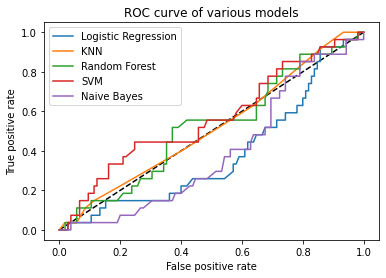

In [124]:
model_list =  [best_LR_model, best_KNN_model, best_RF_model, best_SVM_model, best_NB_model]
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes']

plt.figure(1)
plt.plot([0,1],[0,1],'k--')
for i, model in enumerate([best_LR_model, best_KNN_model, best_RF_model, best_SVM_model, best_NB_model]):

  pred = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, pred)

  # plot this model's ROC curve.
  plt.plot(fpr, tpr, label = model_names[i])
  # calling a method by its string representation in python:
  score = metrics.roc_auc_score(y_test, pred)
  print(f'{scoring_metric} of {model_names[i]} is {score}')
  print()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of various models')
plt.legend(loc = 'best')
plt.show()

In [135]:
plt.style.use('bmh')

roc_auc of Logistic Regression is 0.38236331569664905

roc_auc of KNN is 0.5165784832451499

roc_auc of Random Forest is 0.5194003527336861

roc_auc of SVM is 0.564021164021164

roc_auc of Naive Bayes is 0.39312169312169315



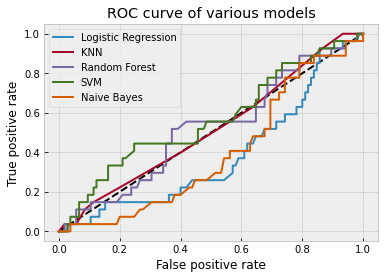

In [136]:
model_list =  [best_LR_model, best_KNN_model, best_RF_model, best_SVM_model, best_NB_model]
model_names = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM', 'Naive Bayes']

plt.figure(1)
plt.plot([0,1],[0,1],'k--')
for i, model in enumerate([best_LR_model, best_KNN_model, best_RF_model, best_SVM_model, best_NB_model]):

  pred = model.predict_proba(X_test)[:, 1]
  fpr, tpr, _ = metrics.roc_curve(y_test, pred)

  # plot this model's ROC curve.
  plt.plot(fpr, tpr, label = model_names[i])
  # calling a method by its string representation in python:
  score = metrics.roc_auc_score(y_test, pred)
  print(f'{scoring_metric} of {model_names[i]} is {score}')
  print()

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of various models')
plt.legend(loc = 'best')
plt.show()

# 5. correlation analysis

In [137]:
import seaborn as sn

In [138]:
corrMatrix = data.corr()

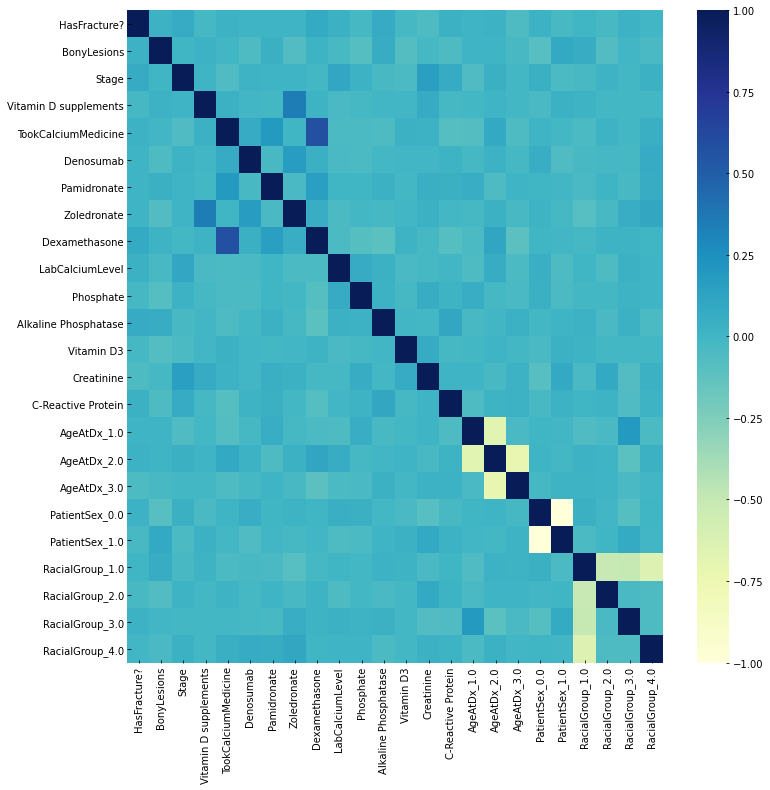

In [141]:
plt.figure(figsize=(12,12))
sn.heatmap(corrMatrix, cmap="YlGnBu")
plt.show()

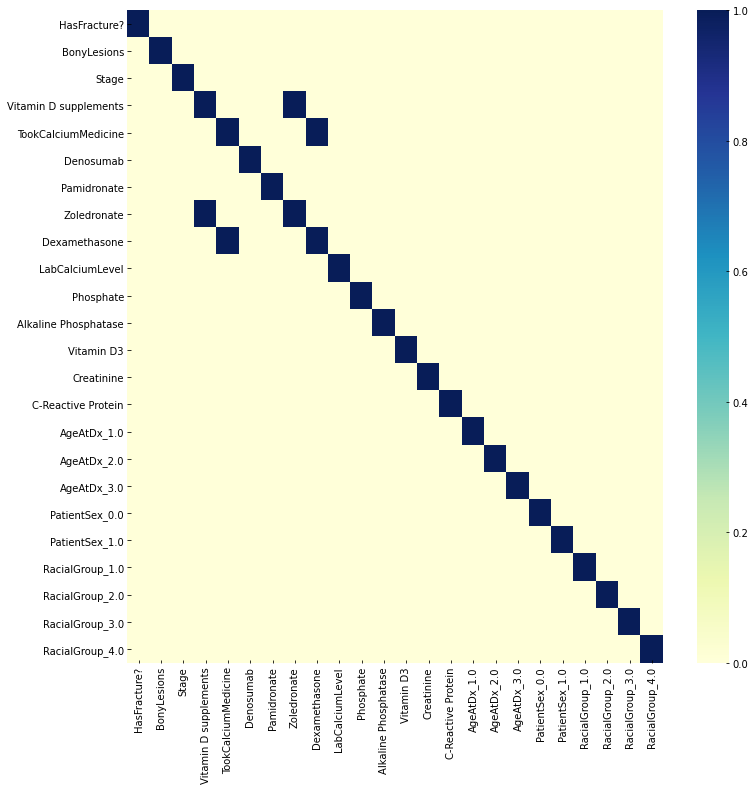

In [146]:
plt.figure(figsize=(12,12))
sn.heatmap(corrMatrix > 0.3, cmap="YlGnBu")
plt.show()

In [151]:
corrMatrix['Dexamethasone']['TookCalciumMedicine']

0.5790832355069945

In [152]:
corrMatrix['Vitamin D supplements']['Zoledronate']

0.35118392997367615

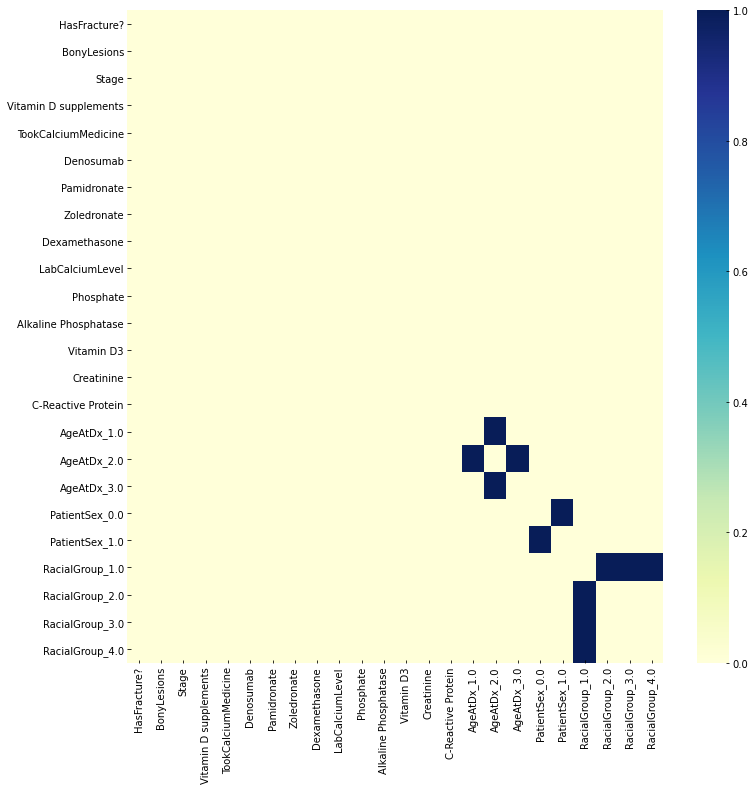

In [154]:
plt.figure(figsize=(12,12))
sn.heatmap(corrMatrix < -0.3, cmap="YlGnBu")
plt.show()

seems like only `'Dexamethasone' 'TookCalciumMedicine'` have a big correlation of 0.58. `'Vitamin D supplements' and 'Zoledronate'` have correlation of 0.35

# 6. Conclusion

1. Accuracy of models are around 0.75 - 0.8 but that doesn't mean a whole lot because models can just predict all patients not to have fracture and get a good score because we have a lot less patients with fracture in dataset (imbalanced)
2. not much linear correlation between variables. `'Dexamethasone' and 'TookCalciumMedicine'` have a correlation of 0.58. `'Vitamin D supplements' and 'Zoledronate'` have correlation of 0.35

f1 of Logistic Regression is 0.0

f1 of KNN is 0.1

f1 of Random Forest is 0.058823529411764705

f1 of SVM is 0.19047619047619047

f1 of Naive Bayes is 0.0

recall of Logistic Regression is 0.0

recall of KNN is 0.07407407407407407

recall of Random Forest is 0.037037037037037035

recall of SVM is 0.14814814814814814

recall of Naive Bayes is 0.0

roc_auc of Logistic Regression is 0.38236331569664905

roc_auc of KNN is 0.5165784832451499

roc_auc of Random Forest is 0.5194003527336861

roc_auc of SVM is 0.564021164021164

roc_auc of Naive Bayes is 0.39312169312169315